# Code

In [1]:
!pip install transformers torch torchvision streamlit pyngrok PILLOW


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.3 MB/s eta 0:00:00


In [2]:
app_code = """
import streamlit as st
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import tempfile
import os

# Setup the processor and model for image captioning
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate multiple captions
# Function to generate multiple captions with more diversity
def generate_multiple_captions(image_path, num_captions=3):
    # Open the image
    raw_image = Image.open(image_path).convert("RGB")

    # Preprocess the image and prepare input for the model
    inputs = processor(raw_image, return_tensors="pt")

    captions = []
    for _ in range(num_captions):
        # Generate captions with more diversity
        out = model.generate(**inputs,
                             num_beams=5,
                             num_return_sequences=1,
                             no_repeat_ngram_size=2,
                             temperature=1.0,  # Add randomness
                             top_p=0.9,        # Sampling from top 90% of the distribution
                             top_k=50)         # Sampling from the top 50 words

        caption = processor.decode(out[0], skip_special_tokens=True)

        # To ensure unique captions, we can check if the caption has already been generated
        while caption in captions:
            out = model.generate(**inputs,
                                 num_beams=5,
                                 num_return_sequences=1,
                                 no_repeat_ngram_size=2,
                                 temperature=1.0,
                                 top_p=0.9,
                                 top_k=50)
            caption = processor.decode(out[0], skip_special_tokens=True)

        captions.append(caption)

    return captions


# Streamlit UI
def main():
    st.title("Image Caption Generator")

    # Upload image
    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

    if uploaded_file is not None:
        # Save the uploaded image as a temporary file
        with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
            tmp_file.write(uploaded_file.read())
            tmp_image_path = tmp_file.name

        # Open the image and display it
        image = Image.open(tmp_image_path)
        st.image(image, caption="Uploaded Image.", use_column_width=True)

        # Generate captions
        num_captions = st.slider("Select the number of captions", 1, 5, 3)
        if st.button("Generate Captions"):
            captions = generate_multiple_captions(tmp_image_path, num_captions)
            for idx, caption in enumerate(captions):
                st.write(f"Caption {idx + 1}: {caption}")

if __name__ == "__main__":
    main()
"""

with open("/content/app.py", "w") as file:
    file.write(app_code)

print("app.py has been saved in Colab!")


app.py has been saved in Colab!


In [3]:
from pyngrok import ngrok

ngrok.set_auth_token("xyz")


In [5]:
import subprocess
from pyngrok import ngrok

subprocess.Popen(['streamlit', 'run', '/content/app.py'])

public_url = ngrok.connect(8501)
print(f"Streamlit app is running at: {public_url}")


Streamlit app is running at: NgrokTunnel: "https://9eb98bb06062.ngrok-free.app" -> "http://localhost:8501"


# Output:

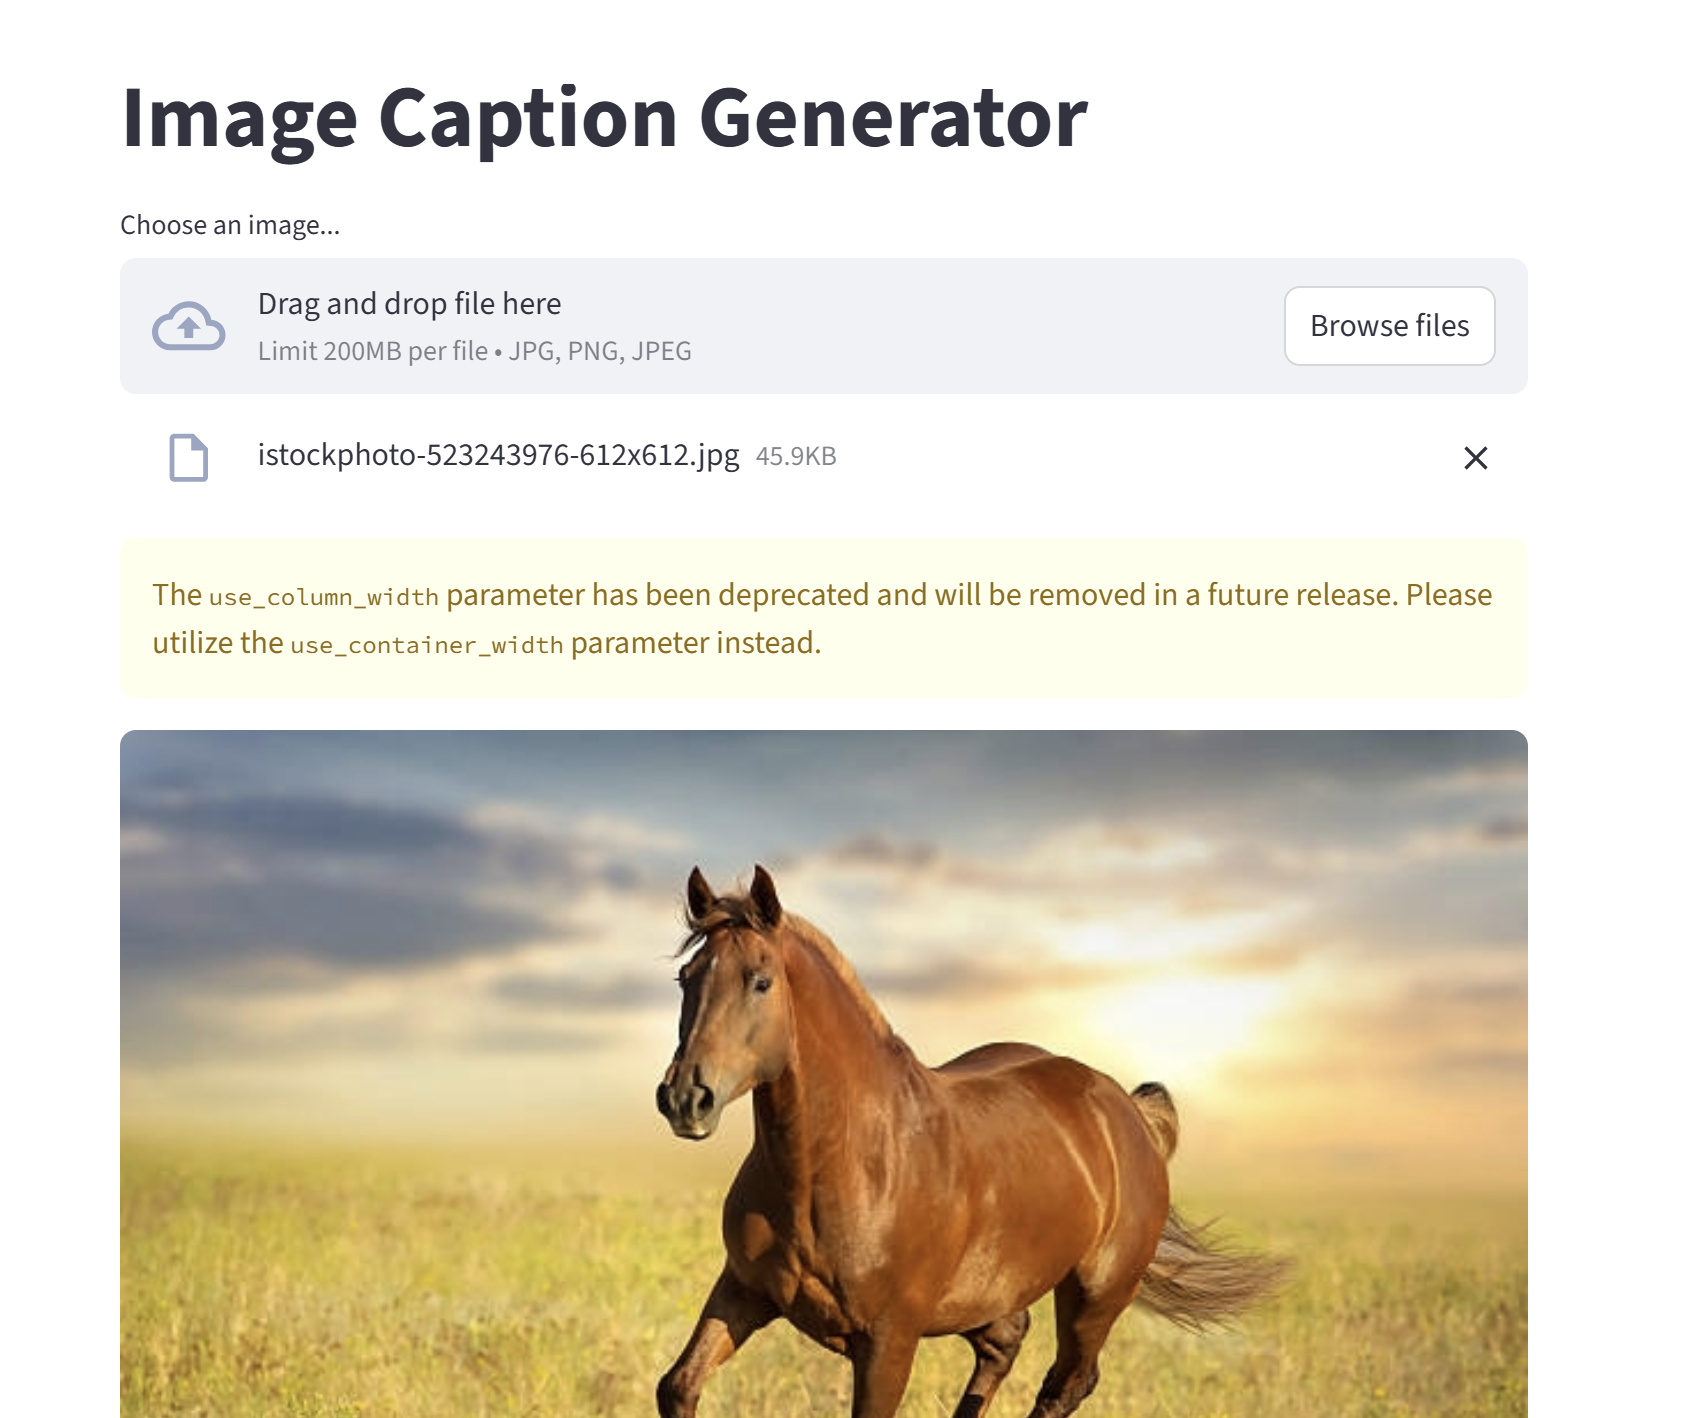

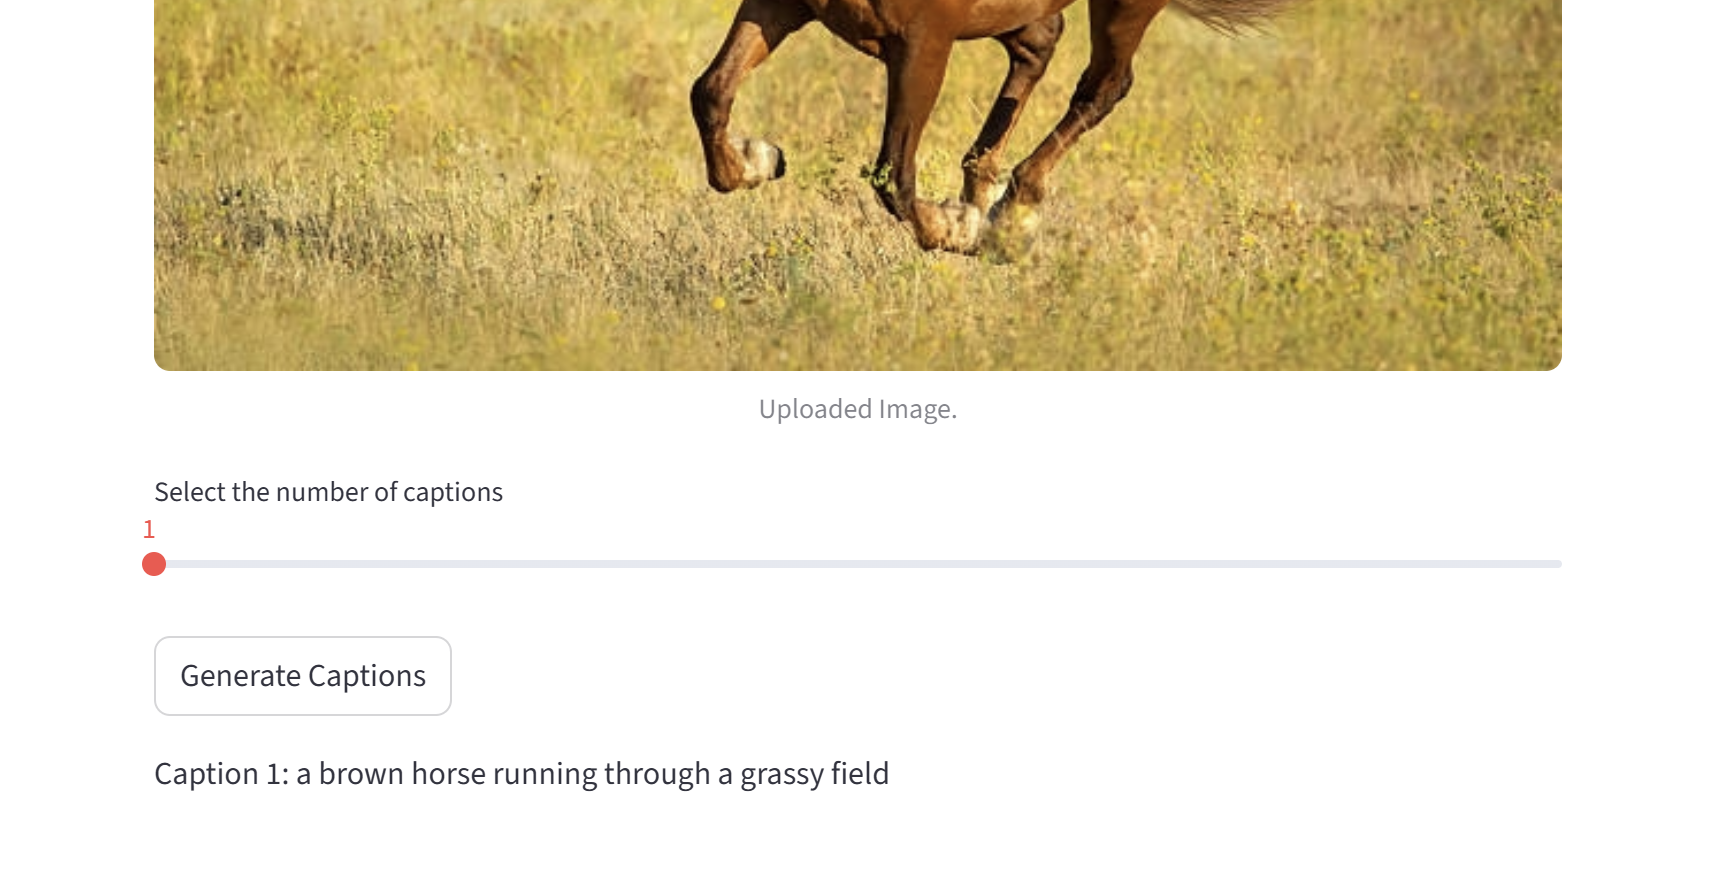